****IMPORTING LIBRARIES****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")

****GATHERING BASIC INFORMATION ABOUT THE DATASET****

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Hence there are no null values**

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.duplicated().sum()

3008

****WE CAN SEE THAT WE HAVE 0 NULL VALUES AND WE HAVE 3008 DUPLICATE VALUES****
**IT IS QUITE UNLIKELY THAT 2 EMPLOYEE HAD THE SAME RESPONSE**
**With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We can proceed by dropping them.**

In [7]:
df.drop_duplicates(inplace = True, keep = 'first')

In [8]:
df.duplicated().sum()

0

**Hence we removed all the duplicates**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


**We now have 11991 observations**

****RENAMING THE COLUMNS****

In [10]:
df = df.rename(columns = {'average_montly_hours' : 'average_monthly_hours', 'time_spend_company' : 'tenure'})

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

****CHECKING FOR OUTLIERS FOR TENURE****

<Axes: title={'center': 'BOXPLOT FOR TENURE'}, xlabel='tenure'>

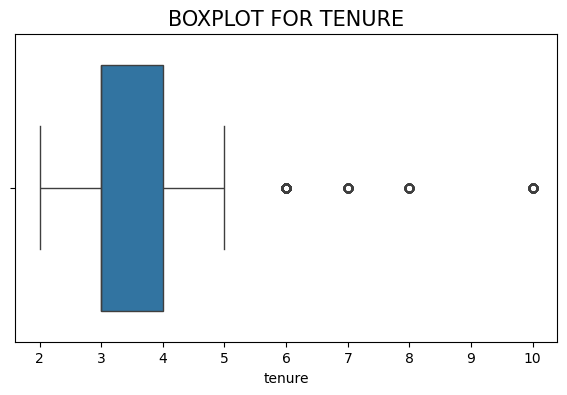

In [12]:
plt.figure(figsize = (7,4))
plt.title("BOXPLOT FOR TENURE" , fontsize = 15)
sns.boxplot(data = df, x='tenure')

**Checking for the no. of outliers                                                                                                            
IT SHOWS THAT VERY LESS PEOPLE HAVE TENURE GREATER THAN 5**

In [13]:
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + (1.5*IQR)
lower_limit = percentile25 - (1.5*IQR)
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print(f" lower limit is : {lower_limit} ")
print(f" upper limit is : {upper_limit} ")
print("no. of outliers are ",len(outliers))


 lower limit is : 1.5 
 upper limit is : 5.5 
no. of outliers are  824


**There are 824 people having tenure more than 5, we won't remove any outliers for now because no. of outlier is quite large and they can be highly relevant for further analysis**

**Now checking for the employees who left**

In [14]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

**A total of 1991 employees left**

In [15]:
df['left'].value_counts(normalize = True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

**approx 17% employees left**

**DATA VISUALISATION**

**We will now create stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.
We will also create a stacked histogram showing distribution of number_project for those who stayed and those who left.**

Text(0.5, 1.0, 'Number of project Histogram')

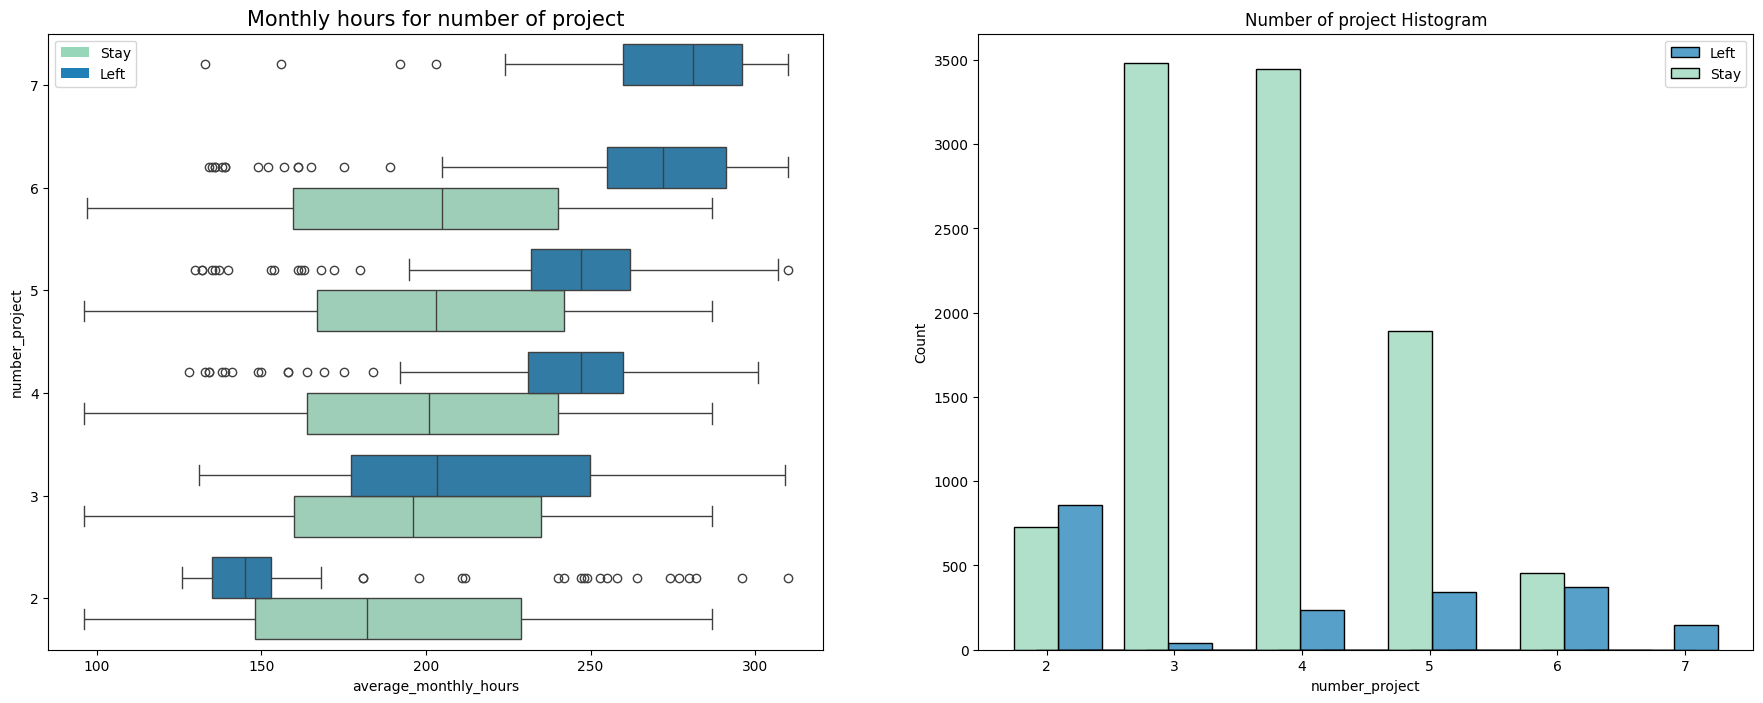

In [16]:
fig ,ax= plt.subplots(1,2, figsize = (22,8))
sns.boxplot(x='average_monthly_hours' , y='number_project',data = df,hue = 'left',orient='h', ax= ax[0],palette = "YlGnBu")
ax[0].invert_yaxis()
legend_labels1 = {0: 'Stay', 1: 'Left'}
handles = [Patch(facecolor=color, label=label) for color, label in zip(sns.color_palette("YlGnBu",2)[:2], legend_labels1.values())]
ax[0].legend(handles=handles,loc='upper left')
ax[0].set_title("Monthly hours for number of project", fontsize = 15)
sns.histplot(x='number_project', data = df, shrink = 4 ,hue = 'left',multiple = 'dodge', ax= ax[1],palette = "YlGnBu")
ax[1].legend(['Left','Stay'])
ax[1].set_title("Number of project Histogram")

***HERE LEFT = 0 MEANS THEY STAY AND LEFT = 1 MEANS THEY LEFT***

THERE ARE MANY OBSERVATION                                                                                                                    
A)Mainly There are two types of employees who left the company.                                                                               
1) Those who worked considerably less than their peers with the same number of projects.                                                      
2) Those who worked much more than their peers with the same number of projects.                                                              
**Those in Group 1 might be fired or they might have been assigned fewer no. of hours of work**                                               
**For those in Group 2 it's understandable that they left because they worked a lot harder and were biggest contributor in projects.**

B) **All employees with 7 projects left the company** and their interquartile range for average monthly hours was nearly 255 to 295 hours that means they worked very very hard

C) The Optimal number of projects for employee seems to be 3 to 4 projects as the left to stay ratio is very less in this aspect.

D)If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = **50 weeks * 45 hours per week / 12 months = 187.5 hours per month.** This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. **It seems that employees here are overworked.**

In [17]:
df[df['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Hence all the Employees with 7 project left

**Average monthly hours versus satisfaction levels scatter plot**

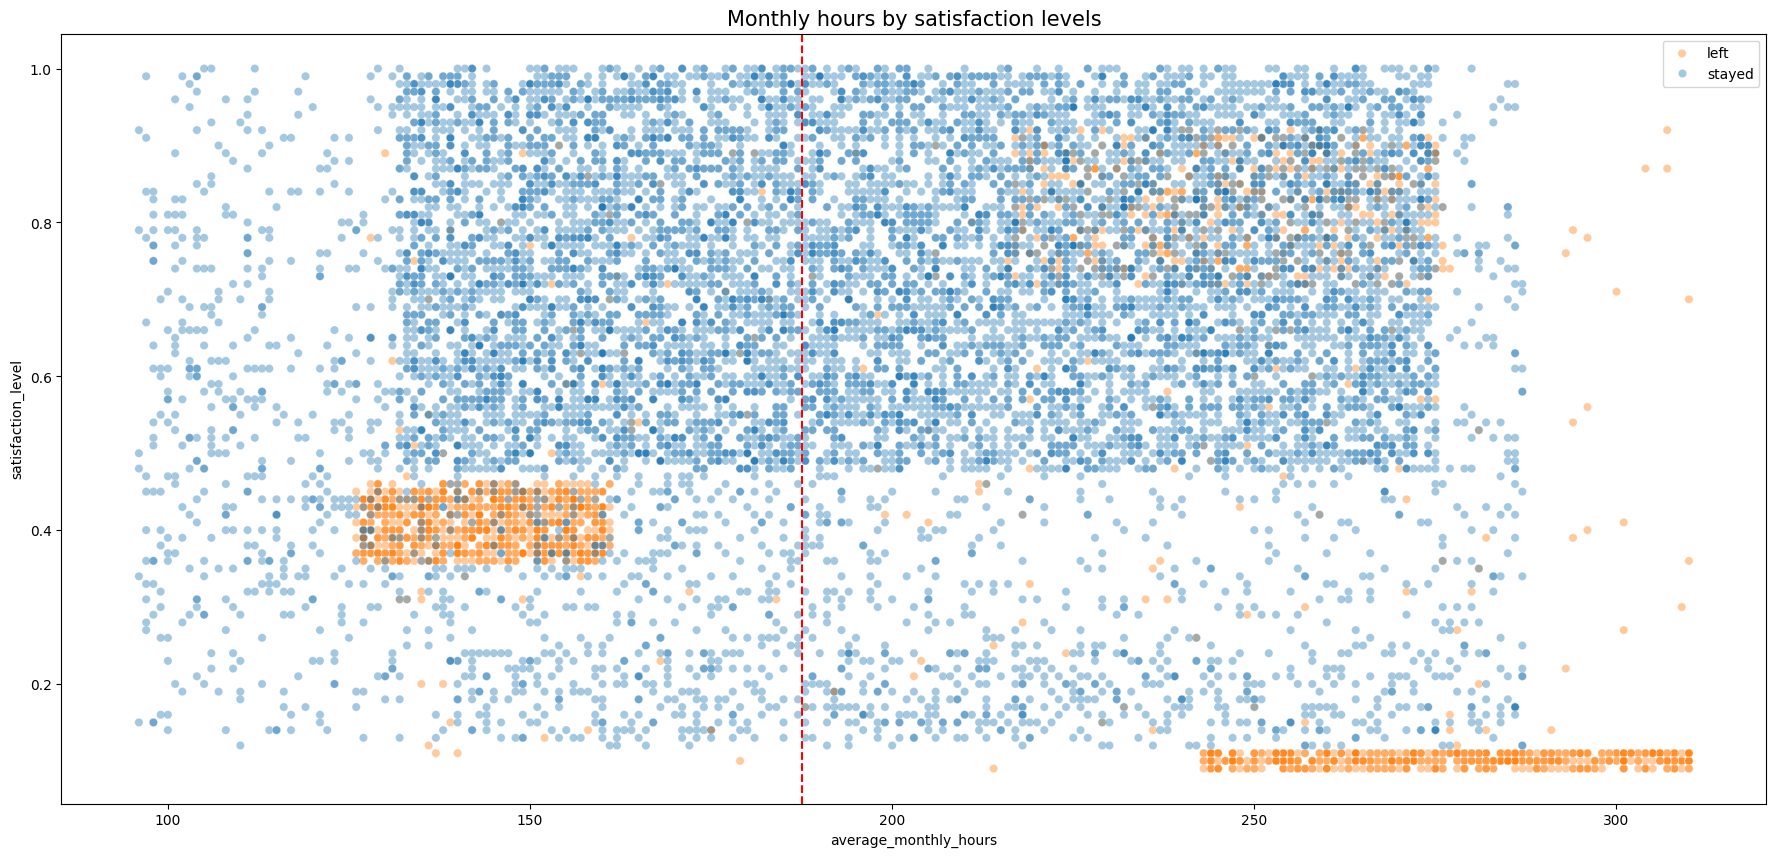

In [18]:
plt.figure(figsize=(22,10))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', alpha = 0.4, hue = 'left')
plt.axvline( x=187.5,color='red',ls='--')
plt.legend(['left','stayed'])
plt.title('Monthly hours by satisfaction levels', fontsize = 15);

**The red line shows average number of working hours per month of employees working Monday–Friday which is 187.5hrs/month for each employee**

We can discuss a few observations about employee who left from this scatterplot
1) There is a group of employee who left the company in the extreme bottom-right, there working hours ranges from ~240 to 320 hours/month and there satisfaction level was near 0 which is reasonable because they overworked a lot more than their peers.
2) There is another group of employee who had normal working hours but still there satisfaction level was only 0.4, there might be some other factors which made them leave the company.
3) And there was another who had working hours ranging from ~215 to 275 hours and there satisfaction level was ~0.7 ot 0.9 

**We will now create stacked boxplot showing satisfaction level distributions for tenure, comparing the distributions of employees who stayed versus those who left.
We will also create a stacked histogram showing distribution of tenure for those who stayed and those who left.**

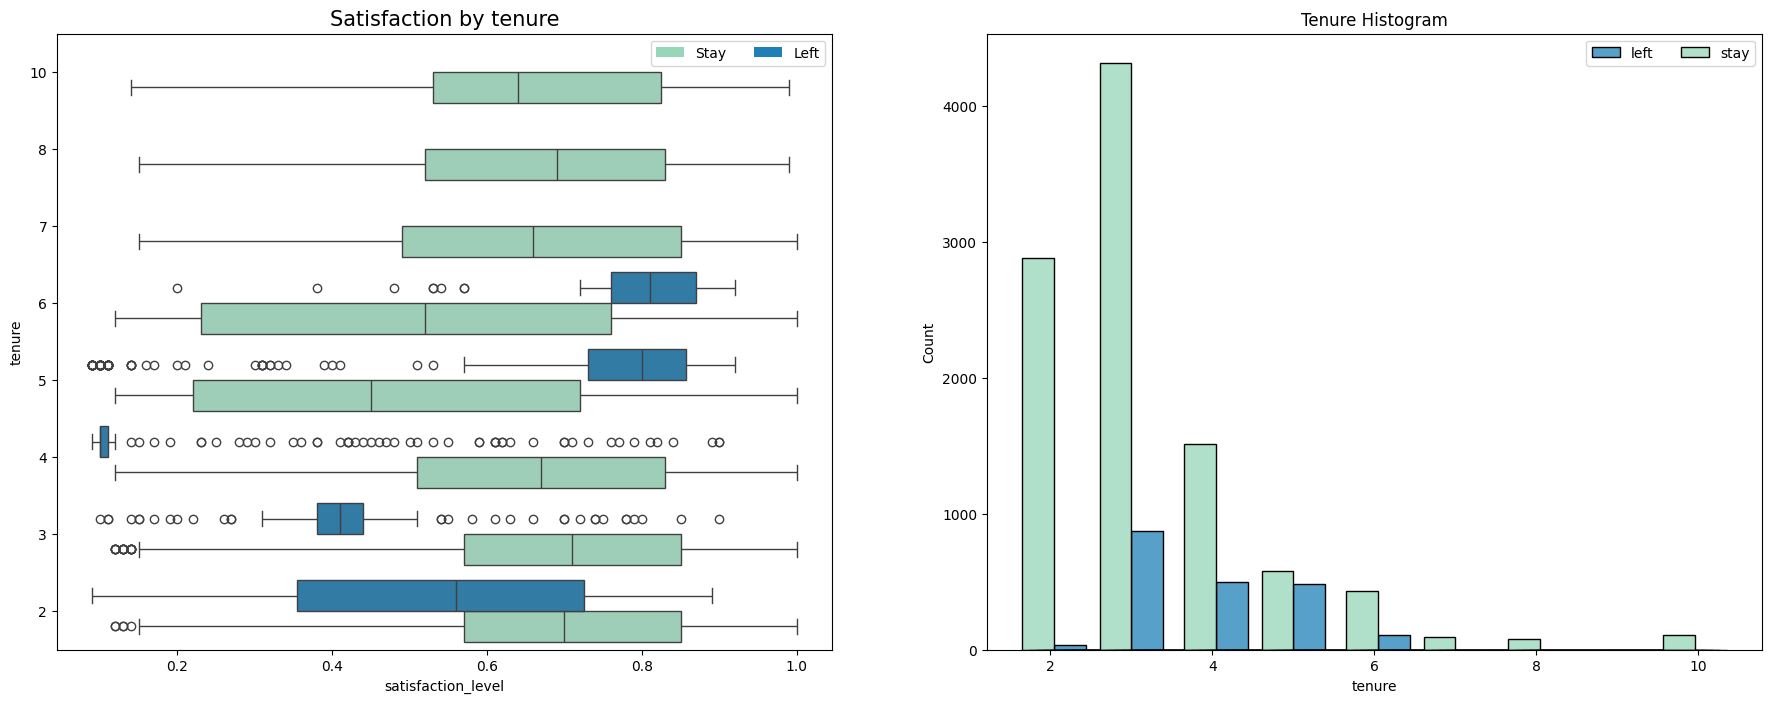

In [19]:
fig,ax = plt.subplots(1,2,figsize = (22,8))
sns.boxplot(data = df, x='satisfaction_level', y='tenure',hue = 'left', orient = 'h', ax= ax[0],palette = "YlGnBu")
ax[0].set_title('Satisfaction by tenure', fontsize = 15)
legend_labels = {0: 'Stay', 1: 'Left'}
handles = [Patch(facecolor=color, label=label) for color, label in zip(sns.color_palette("YlGnBu",2)[:2], legend_labels.values())]
ax[0].legend(handles=handles,ncol=2)
ax[0].invert_yaxis()
sns.histplot(data = df, x='tenure',hue = 'left',shrink = 9,multiple = 'dodge',ax = ax[1],palette = "YlGnBu")
ax[1].set_title('Tenure Histogram')
ax[1].legend(['left','stay'],ncol = 2)

The diagram above can be concluded as:
1) There were mainly two types of employee who left the company                                                                                   A) Dissatisfied Employees with shorter tenure                                                                                                 B) Satisfied Employees with medium length tenure
2) It was seen that few employee with 4year tenure had nearly 0 satisfaction level, if possible the company may check the policy which would have affected employee to leave(only for 4 year tenure).
3) Employees with Longer tenure didn't leave the company.
4) The histogram shows that there are very fewer employees with tenure greater than or equal to 8, It is possible that they were high ranked or higher-paid employees

In [20]:
df[(df['tenure'] == 4) & (df['left'] == 1) & (df['Work_accident'] == 1)].count()


satisfaction_level       28
last_evaluation          28
number_project           28
average_monthly_hours    28
tenure                   28
Work_accident            28
left                     28
promotion_last_5years    28
Department               28
salary                   28
dtype: int64

So there is another possibility that some of the 4 year tenured employee left due to accident, The number is quite small but it might be relevant.

In [21]:
df.groupby('left')['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


It can be seen that employee who didn't leave had greater average/median of satisfaction level than the employee who leave.

Text(0.5, 1.0, 'Salary Distribution by Tenure : Long Term Tenure')

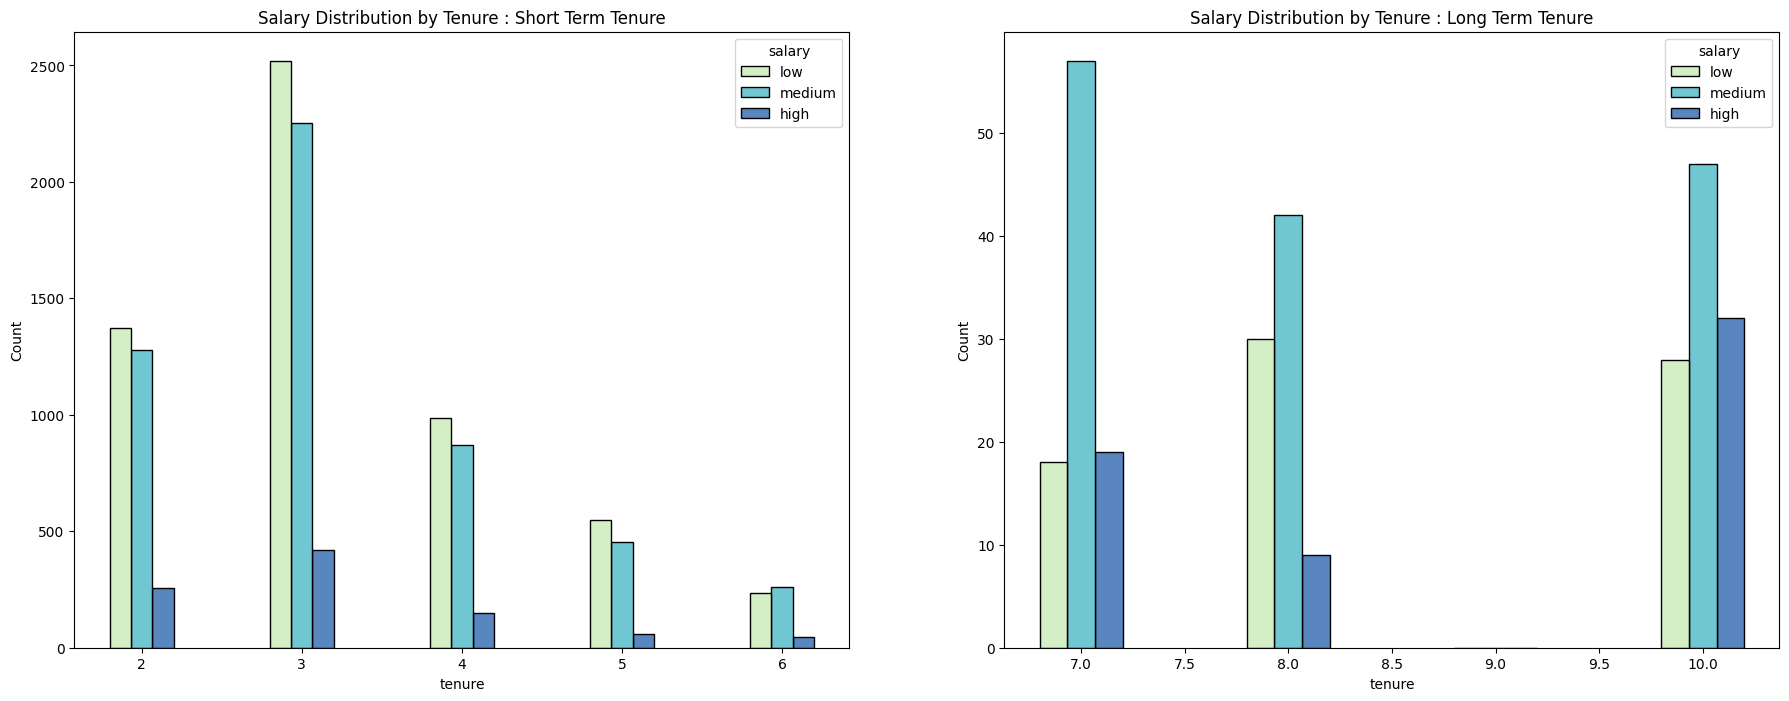

In [22]:
fig,ax = plt.subplots(1,2,figsize = (22,8))
#short tenured people
short_tenure = df[df['tenure'] < 7]
#long tenured people
long_tenure = df[df['tenure'] >= 7]

#for short tenure
sns.histplot(data = short_tenure , x='tenure', hue = 'salary', multiple = 'dodge',
            hue_order = ['low','medium','high'],shrink = .4,ax = ax[0],discrete = 1,palette = "YlGnBu")
ax[0].set_title('Salary Distribution by Tenure : Short Term Tenure')

#for long tenure
sns.histplot(data = long_tenure , x='tenure', hue='salary', multiple = 'dodge',
            hue_order = ['low','medium','high'],shrink = .4,ax = ax[1],discrete = 1,palette = "YlGnBu")
ax[1].set_title('Salary Distribution by Tenure : Long Term Tenure')


The above plot shows that long-tenured employees were not significantly compromised by higher paid employees

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

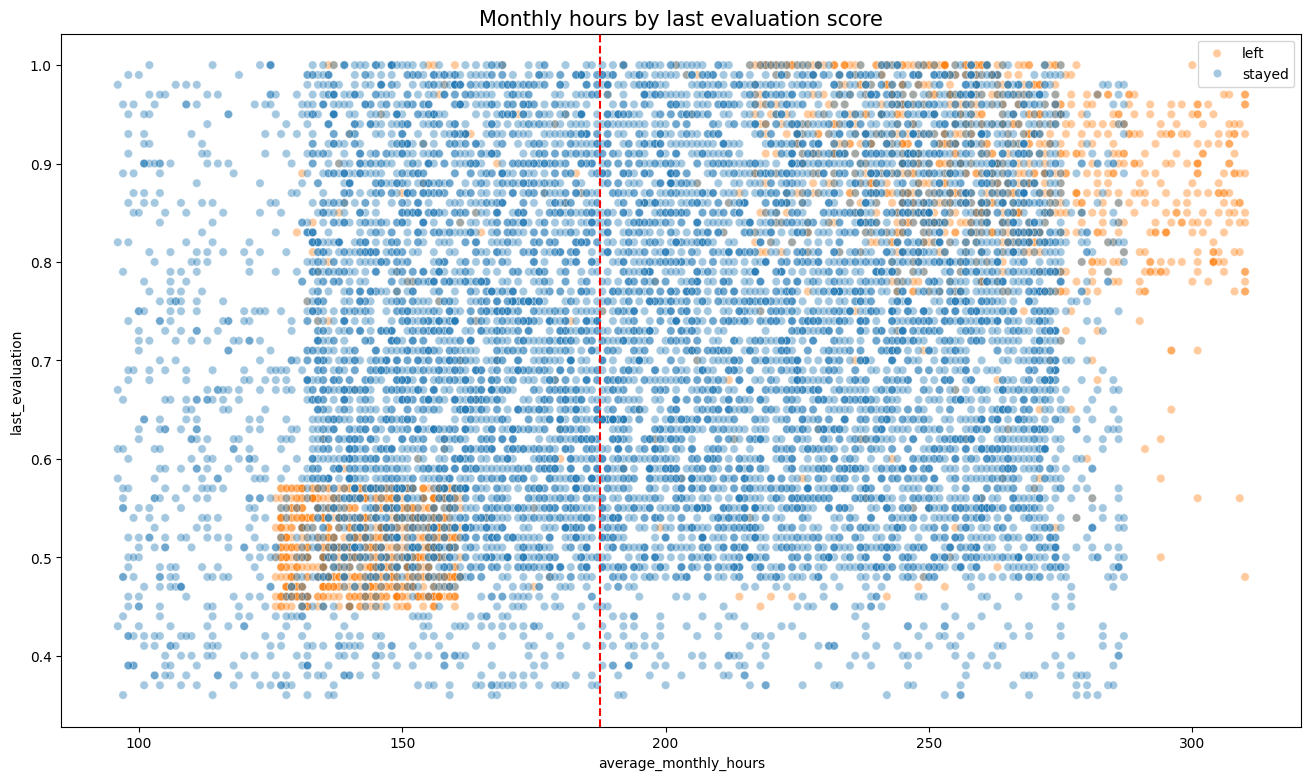

In [23]:
plt.figure(figsize = (16,9))
sns.scatterplot(data = df, x='average_monthly_hours', y = 'last_evaluation',hue = 'left',alpha = 0.4)
plt.axvline(x=187.5 , color ='red', ls = '--')
plt.legend(['left','stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = 15)

**The red line shows average number of working hours per month of employees working Monday–Friday which is 187.5hrs/month for each employee**

The Scatterplot can be evaluated as:
1) There are mainly 2 groups of employees who left the company:
      A) Employees with normal working hours and have very less evaluation score.                                                                   B) Employees with high working hours and have high evaluation score.
3) There seems to be a correlation between working hours and evalution score.
4) Most of the employees work more than the average working hours.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

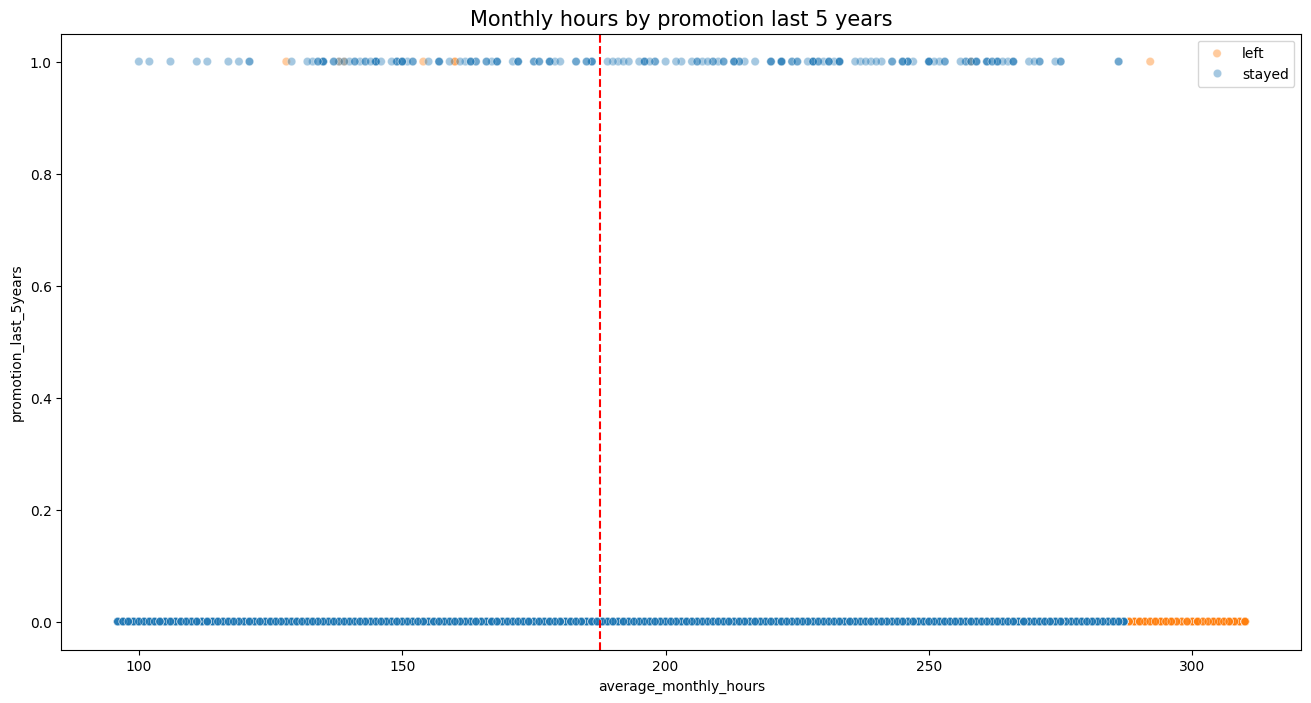

In [24]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df , x= 'average_monthly_hours',y='promotion_last_5years',alpha = 0.4,
               hue='left')
plt.axvline(x=187.5 ,color='red',ls='--')
plt.legend(['left','stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize = 15)

The above scatter plot can be evaluated as:
1) very few employee who were promoted during 5 years left the company.
2) very few employees who worked the most hours were promoted.
3) almost all the employee who left were working the most hours.

In [25]:
df['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Stayed/Left by Department')

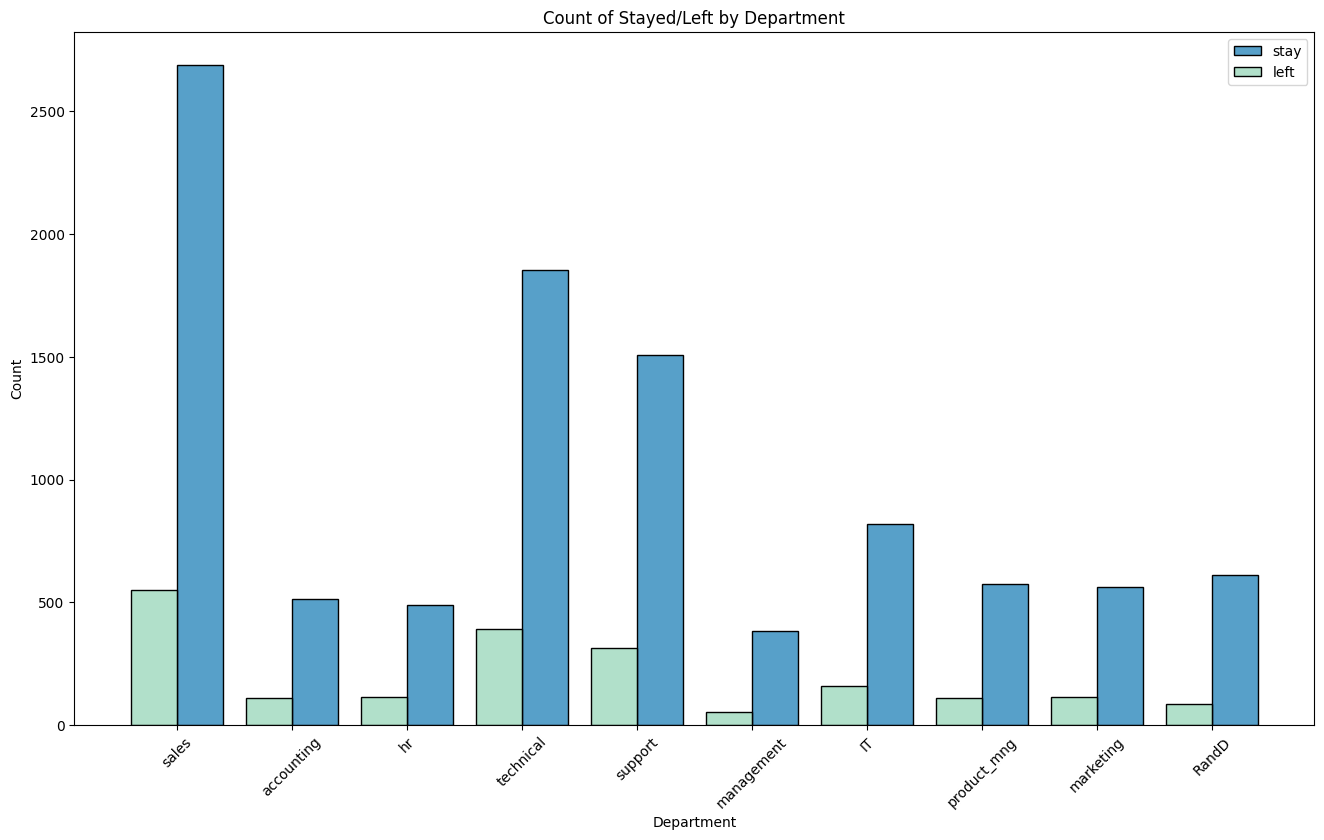

In [26]:
plt.figure(figsize = (16,9))
sns.histplot(data = df, x='Department',hue = 'left',discrete = 1,
            hue_order = (1,0),shrink=0.8,multiple = 'dodge',palette = "YlGnBu")
legend_labels = {0:'stay',1:'left'}
plt.legend(labels=legend_labels.values())
plt.xticks(rotation = 45)
plt.title('Count of Stayed/Left by Department')

*There doesn't seem to be anything special about department wise histogram, the proportion of employee who stayed was greater than the ones who left in all the department*

**Analysing the whether or not the employee experienced an accident during work**

In [27]:
df['Work_accident'].value_counts()

Work_accident
0    10141
1     1850
Name: count, dtype: int64

A TOTAL OF 1850 EMPLOYEES EXPERIENCED ACCIDENT 

****CHECKING THE NO. OF EMPLOYEES WHO LEFT AND EXPERIENCED AN ACCIDENT CLASSIFIED BY THEIR TENURE****

<Axes: xlabel='tenure', ylabel='left'>

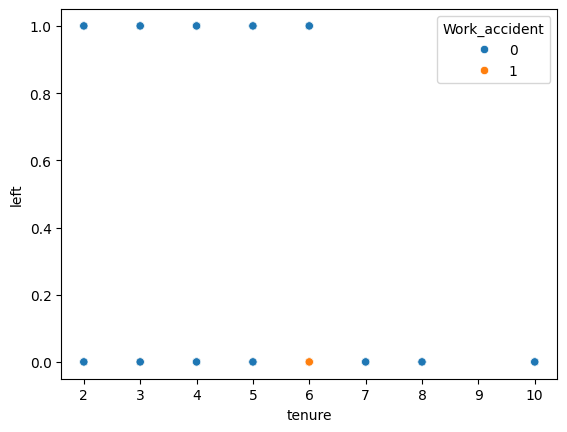

In [28]:
sns.scatterplot(data = df, x='tenure', y= 'left', hue = 'Work_accident')

The scatterplot doesn't show any relevant information about the employees who left and experienced work accident

****CORRELATION HEATMAP****

Text(0.5, 1.0, 'CORRELATION HEATMAP')

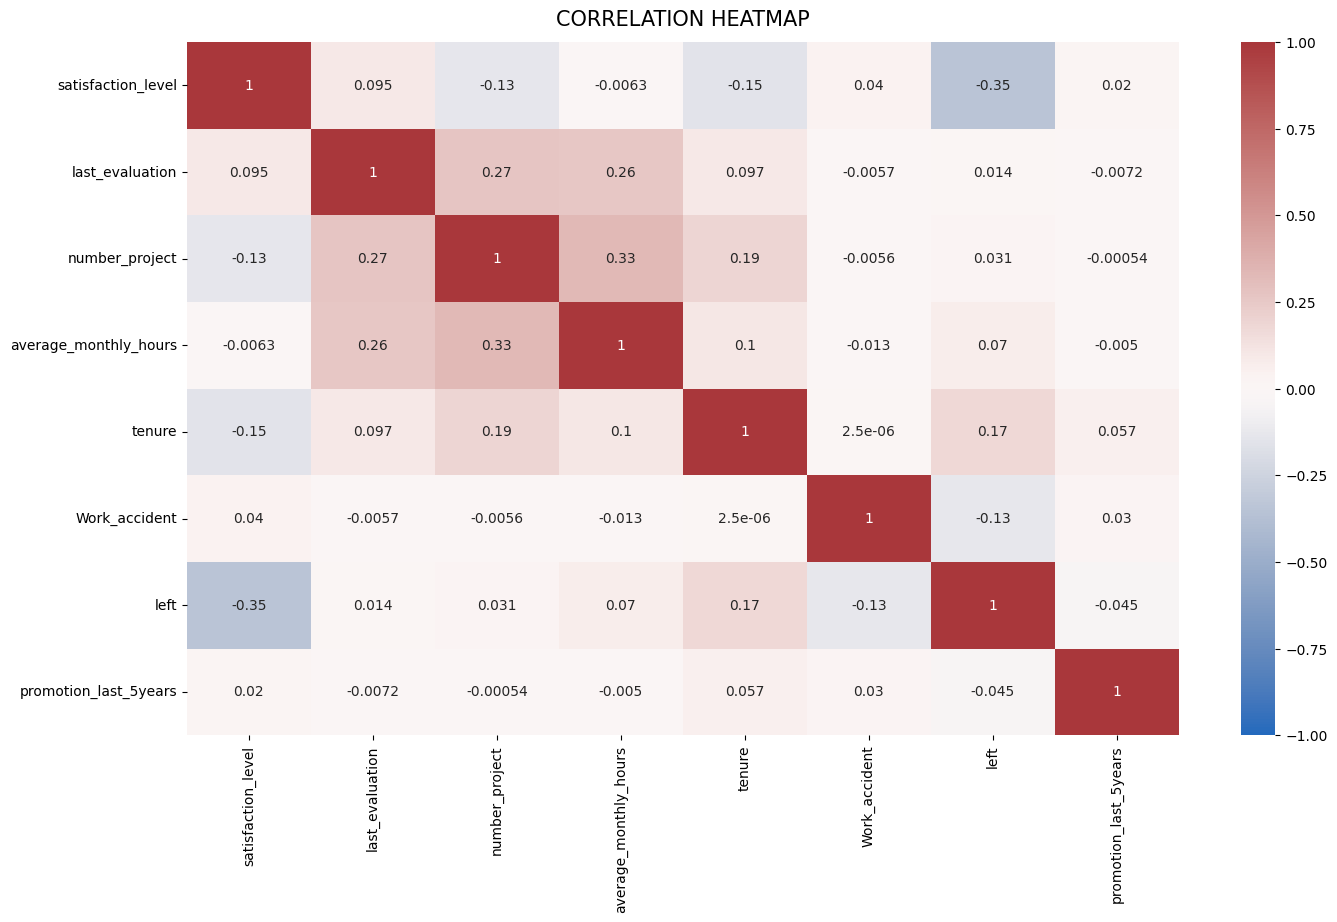

In [29]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1, annot = True, cmap = sns.color_palette("vlag",as_cmap = True))
heatmap.set_title('CORRELATION HEATMAP',fontdict = {"fontsize":15},pad=12)


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

****FINAL INSIGHTS****

It can be seen that employees are leaving the company due to poor management. In most of the cases leaving is caused due to high working hours, high number of projects and less satisfaction levels. Working for extended periods and not receiving raises or high evaluation scores can be very discouraging. It is also noted that if an employee works for more than 6 years at the company, they tend not to leave.